<a href="https://colab.research.google.com/github/K-Wolfe-hub/spds_capstone_3/blob/main/spds_capstone_3_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this workbook is to pull a set of areal images from the NAIP imagery data stored on google's earth engine to evaluate if this dataset can be used for the validation of oil and gas well's location.

##Installing Geemap

In [ ]:
#installing geemap
!pip install geemap

     |████████████████████████████████| 476 kB 2.6 MB/s 
     |████████████████████████████████| 93 kB 947 kB/s 
     |████████████████████████████████| 1.6 MB 40.0 MB/s 
     |████████████████████████████████| 1.2 MB 49.2 MB/s 
     |████████████████████████████████| 98 kB 6.6 MB/s 
     |████████████████████████████████| 76 kB 5.2 MB/s 
     |████████████████████████████████| 130 kB 53.6 MB/s 
     |████████████████████████████████| 1.3 MB 48.7 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 219 kB 59.8 MB/s 
     |████████████████████████████████| 3.3 MB 19.7 MB/s 
     |████████████████████████████████| 115 kB 47.6 MB/s 
     |████████████████████████████████| 392 kB 45.0 MB/s 
     |████████████████████████████████| 112 kB 52.6 MB/s 
     |████████████████████████████████| 551 kB 45.5 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 77 kB 5.2 MB/s 
     |█████████████████████

In [ ]:
import ee
import geemap

Establish connection to google's earth engine. This is the service I am going to pull the NAIP imagery from.

In [ ]:
#establishing connection to Earth Engine (ee) from Colab requires an authorization from my gmail account. ee documentation shows how to do this.
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=GexE_J_fwCYc3rzBR93yFtwlmsVWORezaNArKsPxeY8&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWj0lMq3eimvQkW8_OlkpEq07NH_1coSJ2ZHZ08Xgr8DQKCiP4kp9Gw

Successfully saved authorization token.


##Connecting to google drive for data storage

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#Initial Proof of concept of using geemap to pull imagery from google Earth Engine

##Initial Testing with one Twp in Westmorland Co. PA

In [ ]:
#from the PADEP I downloaded the header information for the oil and gas wells for West Finley township within Washington Co. PA. https://newdata-padep-1.opendata.arcgis.com/datasets/oil-gas-locations-conventional/explore
import pandas as pd
westFinley = pd.read_csv('gdrive/My Drive/Springboard Capstone 3/westfinley.csv')

In [ ]:
westFinley.head()

,X,Y,PERMIT_NUMBER,WELL_NAME,OPERATOR,OPERATOR_NUMBER,WELL_TYPE,STORAGE_FIELD_NAME,WELL_STATUS,WELL_STATUS_CODE,PERMIT_DATE,SPUD_DATE,DATE_PLUGGED,CONSERVATION_IND,WELL_CONFIG_CODE,UNCONVENTIONAL_IND,COUNTY,COUNTY_ID,MUNICIPALITY,MUNICIPALITY_TYPE,MUNICIPALITY_CODE,LATITUDE,LONGITUDE,SURFACE_ELEVATION,WELL_PAD_NAME,WELL_PAD_ID,COAL_IND,UIC_ID,UIC_TYPE_DESCRIPTION,SITE_ID,SITE_NAME,OBJECTID,PERMIT_DATE_EXPIRES
0,-8.954224e+06,4.876810e+06,125-20013,CLETUS D. DILLIE 1,JOHNSON J C,OGO-21805,DRY HOLE,NaN,Plugged OG Well,15,1957/01/16 00:00:00+00,1800/01/01 00:00:00+00,1957/12/20 00:00:00+00,N,Vertical Well,N,Washington,63,West Finley,Twp,63964,40.074744,-80.437166,0,NaN,0,Coal,NaN,NaN,230410,CLETUS D DILLIE 1 WELL,343801,NaN
1,-8.954877e+06,4.877653e+06,125-20039,WILLIAM STOUT 1,JOHNSON J C,OGO-21805,GAS,NaN,Plugged OG Well,15,1958/10/23 00:00:00+00,1800/01/01 00:00:00+00,1960/04/14 00:00:00+00,N,Vertical Well,N,Washington,63,West Finley,Twp,63964,40.080541,-80.443026,1219,NaN,0,Coal,NaN,NaN,230436,WILLIAM STOUT 1 WELL,343980,NaN
2,-8.960797e+06,4.861294e+06,125-20054,RELLA V CUNNINGHAM 4540,MANUFACTURERS LIGHT & HEAT CO,OGO-5371,DRY HOLE,NaN,Plugged OG Well,15,1959/08/21 00:00:00+00,1959/09/05 00:00:00+00,1961/08/07 00:00:00+00,N,Vertical Well,N,Washington,63,West Finley,Twp,63964,39.968008,-80.496206,1358,NaN,0,NonCoal,NaN,NaN,230451,RELLA V CUNNINGHAM 4540 WELL,344117,NaN
3,-8.960303e+06,4.870452e+06,125-20101,WILLIAM G HUNTER 1,SOUTHERN TRIANGLE OIL CO,OGO-17335,DRY HOLE,NaN,Plugged OG Well,15,1962/11/13 00:00:00+00,1962/11/13 00:00:00+00,1962/11/27 00:00:00+00,N,Vertical Well,N,Washington,63,West Finley,Twp,63964,40.031028,-80.491769,1336,NaN,0,NonCoal,NaN,NaN,230498,WILLIAM G HUNTER 1 WELL,344285,NaN
4,-8.956537e+06,4.863944e+06,125-20097,P S KIMMEL 1,MANUFACTURERS LIGHT & HEAT CO,OGO-5371,STORAGE WELL,HEARD,Plugged OG Well,15,NaN,1800/01/01 00:00:00+00,1963/03/07 00:00:00+00,N,Vertical Well,N,Washington,63,West Finley,Twp,63964,39.986250,-80.457944,1271,NaN,0,Coal,NaN,NaN,111856,HEARD OG GAS STORAGE RESERVOIR,344306,NaN


In [ ]:
westFinley['PERMIT_NUMBER'] = westFinley['PERMIT_NUMBER'].str.replace('-','')
westFinley['PERMIT_NUMBER'] = '37'+westFinley['PERMIT_NUMBER'].astype(str)

In [ ]:
westFinley.head()

,X,Y,PERMIT_NUMBER,WELL_NAME,OPERATOR,OPERATOR_NUMBER,WELL_TYPE,STORAGE_FIELD_NAME,WELL_STATUS,WELL_STATUS_CODE,PERMIT_DATE,SPUD_DATE,DATE_PLUGGED,CONSERVATION_IND,WELL_CONFIG_CODE,UNCONVENTIONAL_IND,COUNTY,COUNTY_ID,MUNICIPALITY,MUNICIPALITY_TYPE,MUNICIPALITY_CODE,LATITUDE,LONGITUDE,SURFACE_ELEVATION,WELL_PAD_NAME,WELL_PAD_ID,COAL_IND,UIC_ID,UIC_TYPE_DESCRIPTION,SITE_ID,SITE_NAME,OBJECTID,PERMIT_DATE_EXPIRES
0,-8.954224e+06,4.876810e+06,3712520013,CLETUS D. DILLIE 1,JOHNSON J C,OGO-21805,DRY HOLE,NaN,Plugged OG Well,15,1957/01/16 00:00:00+00,1800/01/01 00:00:00+00,1957/12/20 00:00:00+00,N,Vertical Well,N,Washington,63,West Finley,Twp,63964,40.074744,-80.437166,0,NaN,0,Coal,NaN,NaN,230410,CLETUS D DILLIE 1 WELL,343801,NaN
1,-8.954877e+06,4.877653e+06,3712520039,WILLIAM STOUT 1,JOHNSON J C,OGO-21805,GAS,NaN,Plugged OG Well,15,1958/10/23 00:00:00+00,1800/01/01 00:00:00+00,1960/04/14 00:00:00+00,N,Vertical Well,N,Washington,63,West Finley,Twp,63964,40.080541,-80.443026,1219,NaN,0,Coal,NaN,NaN,230436,WILLIAM STOUT 1 WELL,343980,NaN
2,-8.960797e+06,4.861294e+06,3712520054,RELLA V CUNNINGHAM 4540,MANUFACTURERS LIGHT & HEAT CO,OGO-5371,DRY HOLE,NaN,Plugged OG Well,15,1959/08/21 00:00:00+00,1959/09/05 00:00:00+00,1961/08/07 00:00:00+00,N,Vertical Well,N,Washington,63,West Finley,Twp,63964,39.968008,-80.496206,1358,NaN,0,NonCoal,NaN,NaN,230451,RELLA V CUNNINGHAM 4540 WELL,344117,NaN
3,-8.960303e+06,4.870452e+06,3712520101,WILLIAM G HUNTER 1,SOUTHERN TRIANGLE OIL CO,OGO-17335,DRY HOLE,NaN,Plugged OG Well,15,1962/11/13 00:00:00+00,1962/11/13 00:00:00+00,1962/11/27 00:00:00+00,N,Vertical Well,N,Washington,63,West Finley,Twp,63964,40.031028,-80.491769,1336,NaN,0,NonCoal,NaN,NaN,230498,WILLIAM G HUNTER 1 WELL,344285,NaN
4,-8.956537e+06,4.863944e+06,3712520097,P S KIMMEL 1,MANUFACTURERS LIGHT & HEAT CO,OGO-5371,STORAGE WELL,HEARD,Plugged OG Well,15,NaN,1800/01/01 00:00:00+00,1963/03/07 00:00:00+00,N,Vertical Well,N,Washington,63,West Finley,Twp,63964,39.986250,-80.457944,1271,NaN,0,Coal,NaN,NaN,111856,HEARD OG GAS STORAGE RESERVOIR,344306,NaN


In [ ]:
#Built by modifying the instructions from https://geemap.org/notebooks/11_export_image/ to better match this dataset.
#This code will iterate through the dataset of wells, selecting each well's API# and location and use this data to pull the 250 cells surrounding the suposed wellhead from the NAIP data and then pull the elevation from the USGS' dem
demElev=[]
for i in range(len(westFinley)):
  lon = westFinley.iloc[i].LONGITUDE
  lat = westFinley.iloc[i].LATITUDE
  api = westFinley.iloc[i].PERMIT_NUMBER
  loc = ee.Geometry.Point((lon,lat))
  locbuf= loc.buffer(distance=250)
  roi = locbuf.coordinates()
  roi_ee = ee.Geometry.Polygon(roi)
  collection = ee.ImageCollection('USDA/NAIP/DOQQ').filterBounds(loc).filterDate('2019-01-01', '2020-12-31')
  img = collection.first()
  geemap.ee_export_image_to_drive(img, description=api, folder='exports250', region=roi_ee)
  elev = ee.Image('USGS/NED').sample(loc).first().get('elevation').getInfo()
  demElev.append((api,elev))

Exporting 3712520013 ...
Exporting 3712520039 ...
Exporting 3712520054 ...
Exporting 3712520101 ...
Exporting 3712520097 ...
Exporting 3712520099 ...
Exporting 3712520100 ...
Exporting 3712520147 ...
Exporting 3712520693 ...
Exporting 3712520792 ...
Exporting 3712520810 ...
Exporting 3712520814 ...
Exporting 3712500804 ...
Exporting 3712521586 ...
Exporting 3712521550 ...
Exporting 3712521563 ...
Exporting 3712521699 ...
Exporting 3712500798 ...
Exporting 3712521712 ...
Exporting 3712520012 ...
Exporting 3712521721 ...
Exporting 3712521718 ...
Exporting 3712500799 ...
Exporting 3712521720 ...
Exporting 3712500831 ...
Exporting 3712500800 ...
Exporting 3712521727 ...
Exporting 3712500813 ...
Exporting 3712521742 ...
Exporting 3712500812 ...
Exporting 3712500796 ...
Exporting 3712501605 ...
Exporting 3712521792 ...
Exporting 3712520091 ...
Exporting 3712520821 ...
Exporting 3712520093 ...
Exporting 3712521800 ...
Exporting 3712500832 ...
Exporting 3712521799 ...
Exporting 3712500801 ...


In [ ]:
demElev[0:5]

[('3712520013', 380.3232421875),
 ('3712520039', 388.9142761230469),
 ('3712520054', 415.93206787109375),
 ('3712520101', 409.69287109375),
 ('3712520097', 389.86016845703125)]

##Scaling up to all of Westmorland Co. PA (about 4400 well locations)

In [ ]:
#from the PADEP I downloaded the header information for the oil and gas wells for Washington Co. PA. https://newdata-padep-1.opendata.arcgis.com/datasets/oil-gas-locations-conventional/explore
import pandas as pd
wash = pd.read_csv('gdrive/My Drive/Springboard Capstone 3/WashingtonCo_OG_Conv.csv',low_memory=False)

In [ ]:
wash.head(1)

,X,Y,PERMIT_NUMBER,WELL_NAME,OPERATOR,OPERATOR_NUMBER,WELL_TYPE,STORAGE_FIELD_NAME,WELL_STATUS,WELL_STATUS_CODE,PERMIT_DATE,SPUD_DATE,DATE_PLUGGED,CONSERVATION_IND,WELL_CONFIG_CODE,UNCONVENTIONAL_IND,COUNTY,COUNTY_ID,MUNICIPALITY,MUNICIPALITY_TYPE,MUNICIPALITY_CODE,LATITUDE,LONGITUDE,SURFACE_ELEVATION,WELL_PAD_NAME,WELL_PAD_ID,COAL_IND,UIC_ID,UIC_TYPE_DESCRIPTION,SITE_ID,SITE_NAME,OBJECTID,PERMIT_DATE_EXPIRES
0,-8942494.737,4883347.958,125-00025,A L ASHBROOK (NOW) A D MOUNTS U328,PRESTON OIL CO,OGO-12613,UNDETERMINED,NaN,Plugged OG Well,15.0,1956/04/01 00:00:00+00,1800/01/01 00:00:00+00,NaN,N,Vertical Well,N,Washington,63.0,Buffalo,Twp,63916.0,40.119672,-80.331797,1236.0,NaN,0.0,NonCoal,NaN,NaN,228821.0,AL ASHBROOK NOW AD MT U328 WELL,539040.0,NaN


In [ ]:
wash['PERMIT_NUMBER'] = wash['PERMIT_NUMBER'].str.replace('-','')
wash['PERMIT_NUMBER'].dropna()
wash['PERMIT_NUMBER'] = '37'+wash['PERMIT_NUMBER'].astype(str)

In [ ]:
wash.head(1)

,X,Y,PERMIT_NUMBER,WELL_NAME,OPERATOR,OPERATOR_NUMBER,WELL_TYPE,STORAGE_FIELD_NAME,WELL_STATUS,WELL_STATUS_CODE,PERMIT_DATE,SPUD_DATE,DATE_PLUGGED,CONSERVATION_IND,WELL_CONFIG_CODE,UNCONVENTIONAL_IND,COUNTY,COUNTY_ID,MUNICIPALITY,MUNICIPALITY_TYPE,MUNICIPALITY_CODE,LATITUDE,LONGITUDE,SURFACE_ELEVATION,WELL_PAD_NAME,WELL_PAD_ID,COAL_IND,UIC_ID,UIC_TYPE_DESCRIPTION,SITE_ID,SITE_NAME,OBJECTID,PERMIT_DATE_EXPIRES
0,-8942494.737,4883347.958,3712500025,A L ASHBROOK (NOW) A D MOUNTS U328,PRESTON OIL CO,OGO-12613,UNDETERMINED,NaN,Plugged OG Well,15.0,1956/04/01 00:00:00+00,1800/01/01 00:00:00+00,NaN,N,Vertical Well,N,Washington,63.0,Buffalo,Twp,63916.0,40.119672,-80.331797,1236.0,NaN,0.0,NonCoal,NaN,NaN,228821.0,AL ASHBROOK NOW AD MT U328 WELL,539040.0,NaN


##Pulling Washington Co. Data from EE (only run once)

In [ ]:
#Built by modifying the instructions from https://geemap.org/notebooks/11_export_image/ to better match this dataset.
#This code will iterate through the dataset of wells, selecting each well's API# and location and use this data to pull the 250 cells surrounding the suposed wellhead from the NAIP data and then pull the elevation from the USGS' dem
demElev=[]
skipped=[]
for i in range(len(wash)):
  try:
    lon = wash.iloc[i].LONGITUDE
    lat = wash.iloc[i].LATITUDE
    api = wash.iloc[i].PERMIT_NUMBER
    loc = ee.Geometry.Point((lon,lat))
    locbuf= loc.buffer(distance=250)
    roi = locbuf.coordinates()
    roi_ee = ee.Geometry.Polygon(roi)
    collection = ee.ImageCollection('USDA/NAIP/DOQQ').filterBounds(loc).filterDate('2019-01-01', '2020-12-31')
    img = collection.first()
    geemap.ee_export_image_to_drive(img, description=api, folder='wash250', region=roi_ee)
    elev = ee.Image('USGS/NED').sample(loc).first().get('elevation').getInfo()
    demElev.append((api,elev))
  except:
    skipped.append(api)
    print('error')
print(str(len(skipped))+' wells were skipped.')

In [ ]:
demElev[0:5]

NameError: ignored

#Data Exploration

##Once images were collected I seperated them into seperate folders for images I could see evidence of the well location and ones where there was not easy identified evidence of a well.

In [ ]:
import os

In [ ]:
#pull lists of filenames which I will trim off the file type and use these as a list to add lables to the header data above.
visible_list = os.listdir(path='gdrive/My Drive/wash250/visible/')
nvisible_list = os.listdir(path='gdrive/My Drive/wash250/not_visible/')
unk_list = os.listdir(path='gdrive/My Drive/wash250/unknown/')
w250 = os.listdir(path='gdrive/My Drive/wash250/')
print('vis/not/unk: '+str(len(visible_list))+'/'+str(len(nvisible_list))+'/'+str(len(unk_list)))
print(len(w250))

vis/not/unk: 2958/400/54
3


3 is ok for what is in wash250. That is the 3 folders.

In [ ]:
import pandas as pd
vis = pd.DataFrame(visible_list,columns=['PERMIT_NUMBER'])
vis['PERMIT_NUMBER'] = vis['PERMIT_NUMBER'].str.replace('.tif','')
vis['visible']=1
vis.set_index('PERMIT_NUMBER',inplace=True, drop=True)
vis.head()

,visible
PERMIT_NUMBER,
3712521533,1
3712521536,1
3712521535,1
3712521537,1
3712521538,1


In [ ]:
nvis = pd.DataFrame(nvisible_list,columns=['PERMIT_NUMBER'])
nvis['PERMIT_NUMBER'] = nvis['PERMIT_NUMBER'].str.replace('.tif','')
nvis['visible']=0
nvis.set_index('PERMIT_NUMBER',inplace=True, drop=True)
nvis.head()

,visible
PERMIT_NUMBER,
3712500026,0
3712500051,0
3712500082,0
3712500083,0
3712500094,0


In [ ]:
fullvis = vis.append(nvis)
fullvis['visible'].unique()

array([1, 0])

In [ ]:
wash.set_index('PERMIT_NUMBER',inplace=True, drop=False)
wash.drop('37nan',inplace=True)
washfull = wash.join(fullvis,how='left')


In [ ]:
washfull = washfull[washfull['PERMIT_NUMBER'].isin(fullvis.index)]

In [ ]:
washfull['visible'].fillna(value=0,inplace=True)
washfull.tail(1)

,X,Y,PERMIT_NUMBER,WELL_NAME,OPERATOR,OPERATOR_NUMBER,WELL_TYPE,STORAGE_FIELD_NAME,WELL_STATUS,WELL_STATUS_CODE,PERMIT_DATE,SPUD_DATE,DATE_PLUGGED,CONSERVATION_IND,WELL_CONFIG_CODE,UNCONVENTIONAL_IND,COUNTY,COUNTY_ID,MUNICIPALITY,MUNICIPALITY_TYPE,MUNICIPALITY_CODE,LATITUDE,LONGITUDE,SURFACE_ELEVATION,WELL_PAD_NAME,WELL_PAD_ID,COAL_IND,UIC_ID,UIC_TYPE_DESCRIPTION,SITE_ID,SITE_NAME,OBJECTID,PERMIT_DATE_EXPIRES,visible
PERMIT_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3712592161,-8940179.291,4870228.03,3712592161,D. E. KAHLBAUGH 1,UNKNOWN OPR,OGO-99999,DRY HOLE,NaN,Abandoned,6.0,NaN,1800/01/01 00:00:00+00,NaN,N,Vertical Well,N,Washington,63.0,Morris,Twp,63943.0,40.029486,-80.310997,1035.0,NaN,0.0,NaN,NaN,NaN,802743.0,D. E. KAHLBAUGH,520240.0,NaN,1.0


##Looking at the well status' for the wells in Westmorland Co. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
required_cols=['X','Y','WELL_STATUS_CODE','LATITUDE','LONGITUDE']
washfull.dropna(axis=0,how='any',subset=required_cols,inplace=True)

In [ ]:
unneeded_cols = ['UIC_ID',"UIC_TYPE_DESCRIPTION",'WELL_PAD_NAME','STORAGE_FIELD_NAME','COAL_IND']
washfull.drop(columns=unneeded_cols,inplace=True)

In [ ]:
wash_missing = pd.concat([washfull.isnull().sum(), 100 * washfull.isnull().mean()], axis=1)
wash_missing.columns=['count', '%']
wash_missing[wash_missing['count']>0].sort_values(by='count',ascending=False)

,count,%
PERMIT_DATE_EXPIRES,2188,65.138434
DATE_PLUGGED,2040,60.732361
PERMIT_DATE,405,12.057160
SPUD_DATE,322,9.586186
MUNICIPALITY_TYPE,12,0.357249


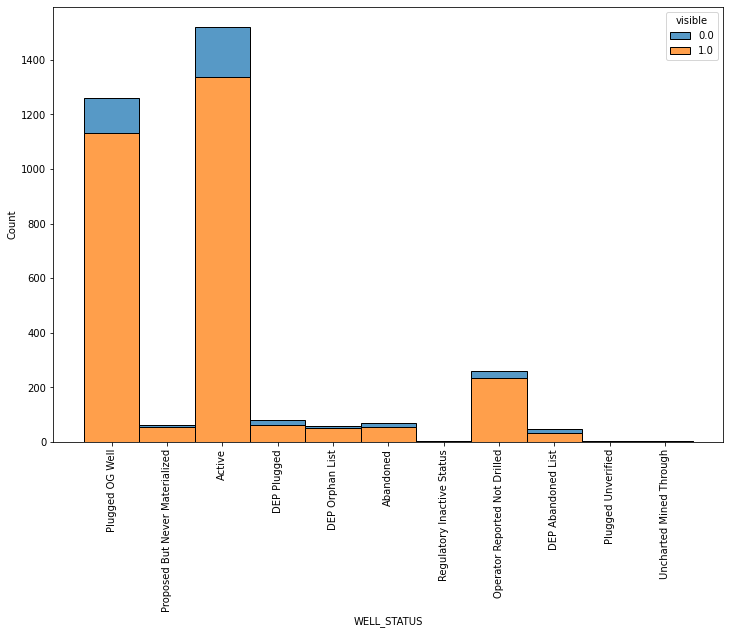

In [ ]:
x_ticks = washfull['WELL_STATUS'].unique()
f, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=washfull,x='WELL_STATUS',hue='visible',multiple='stack')
ax.set_xticklabels(x_ticks,rotation=90)
plt.show()

In [ ]:
washfull['vintage'] = pd.to_datetime(washfull['SPUD_DATE']).dt.year

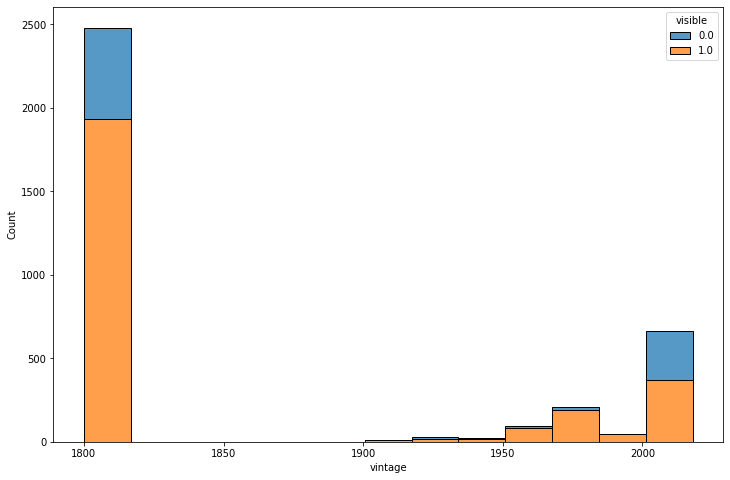

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=washfull,x='vintage',hue='visible',multiple='stack')
plt.show()

Check that all of the images have the same shape. consider are there transformaitons that make sense to do on these images???

In [ ]:
#write the final file to the data folder
washfull.to_csv('gdrive/My Drive/Springboard Capstone 3/wash_header.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
#only needed if jumping in just for EDA
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Read the header data for the wells in Washington Co. only needed if just jumping in for EDA
wash_head = pd.read_csv('gdrive/My Drive/Springboard Capstone 3/wash_header.csv')

In [ ]:
#pull the list of image files we'll want to use. Based on https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
from os import listdir
from os.path import isfile, join
padImagesFiles = [f for f in listdir('gdrive/My Drive/wash250/visible/') if isfile(join('gdrive/My Drive/wash250/visible/', f))]
padImagesFiles2 = [f for f in listdir('gdrive/My Drive/wash250/not_visible/') if isfile(join('gdrive/My Drive/wash250/not_visible/', f))]
#for f in padImagesFiles2:
#  padImagesFiles.append(f)
print(len(padImagesFiles))
print(padImagesFiles[0:3])

2958
['3712521536.tif', '3712521535.tif', '3712521537.tif']


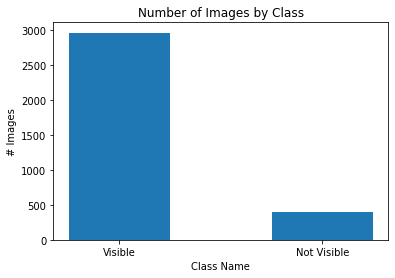

In [ ]:
#Looking at the distribution of my classes (visible and not visible well pads)
imgClasses = {'Visible':len(padImagesFiles),'Not Visible':len(padImagesFiles2)}
plt.bar(imgClasses.keys(),imgClasses.values(),width=0.5);
plt.title('Number of Images by Class');
plt.xlabel('Class Name');
plt.ylabel('# Images');
plt.show()

There is definately imbalance in these catagories. If I am having issue training a model I may need to add more images without a well in it.

In [ ]:
#examining the size of the image files
imgShapes = []
for f in range(len(padImagesFiles)):
  temp = cv.imread('gdrive/My Drive/wash250/visible/'+padImagesFiles[f])
  h, w, d = temp.shape
  imgShapes.append([padImagesFiles[f],h,w,1])
imgShapes[0]

['3712521536.tif', 84, 84, 1]

In [ ]:
for f in range(len(padImagesFiles2)):
  temp = cv.imread('gdrive/My Drive/wash250/not_visible/'+padImagesFiles2[f])
  h, w, d = temp.shape
  imgShapes.append([padImagesFiles2[f],h,w,0])

In [ ]:
imgShape = pd.DataFrame(imgShapes,columns=['file','h','w','visible'])
imgShape.head(1)

,file,h,w,visible
0,3712521536.tif,84,84,1


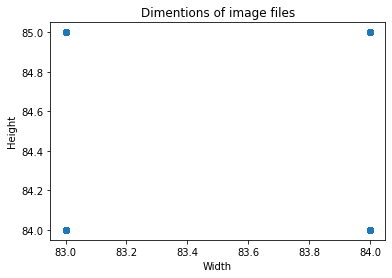

In [ ]:
plt.scatter(imgShape['w'],imgShape['h'])
plt.title('Dimentions of image files');
plt.xlabel('Width');
plt.ylabel('Height');
plt.show()

It looks like for all files the width is either 83 or 84 and the height is either 84 or 85.

In [ ]:
img = cv.imread('gdrive/My Drive/wash250/visible/'+padImagesFiles[0])
img.shape

(85, 84, 3)

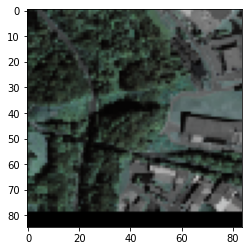

In [ ]:
plt.imshow(img)

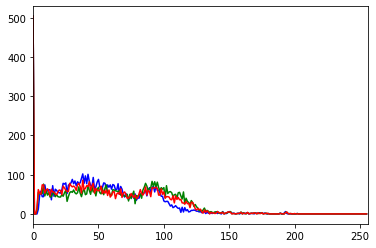

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

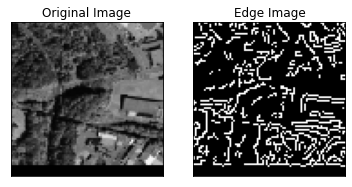

In [ ]:
gray = cv.imread('gdrive/My Drive/wash250/visible/'+padImagesFiles[0],0)
edges = cv.Canny(gray,180,230,apertureSize=3)
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

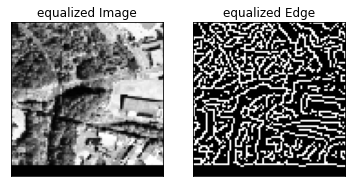

In [ ]:
#what does and equalized grayscale image look like
#from https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html
equ = cv.equalizeHist(gray)
equedges = cv.Canny(equ,50,240,apertureSize=7)
plt.subplot(121),plt.imshow(equ,cmap = 'gray')
plt.title('equalized Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(equedges,cmap = 'gray')
plt.title('equalized Edge'), plt.xticks([]), plt.yticks([])
plt.show()

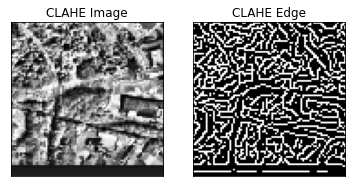

In [ ]:
# create a CLAHE object (Arguments are optional).
#from https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html
clahe = cv.createCLAHE(clipLimit=30.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray)
cl1edges = cv.Canny(cl1,230,240,apertureSize=7)
plt.subplot(121),plt.imshow(cl1,cmap = 'gray')
plt.title('CLAHE Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cl1edges,cmap = 'gray')
plt.title('CLAHE Edge'), plt.xticks([]), plt.yticks([])
plt.show()

I feel like that may overdo the contrast

In [ ]:
#creating the info.dat file for training the openCV cascade classifier. Becasue the target pad location is at the center of each image I am able to just create a box around the center of each image as the bounding box for the pad.
#info= open('gdrive/My Drive/wash250/visible/info.dat','w')
#for i in padImagesFiles:
# info.writelines(i+'  1  38 38 8 8'+'\n')
#info.close()

In [ ]:
#creating the bg.txt file for training the openCV cascade classifier
#background= open('gdrive/My Drive/wash250/not_visible/bg.txt','w')
#for i in padImagesFiles2:
#  background.writelines(i+'\n')
#background.close()